<a href="https://colab.research.google.com/github/adithyaprabhu007/math-coding-notes/blob/main/logistic_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged at epoch 552
Final weights: [0.8725114  0.48859376]
Final bias: 0.19914793287005653


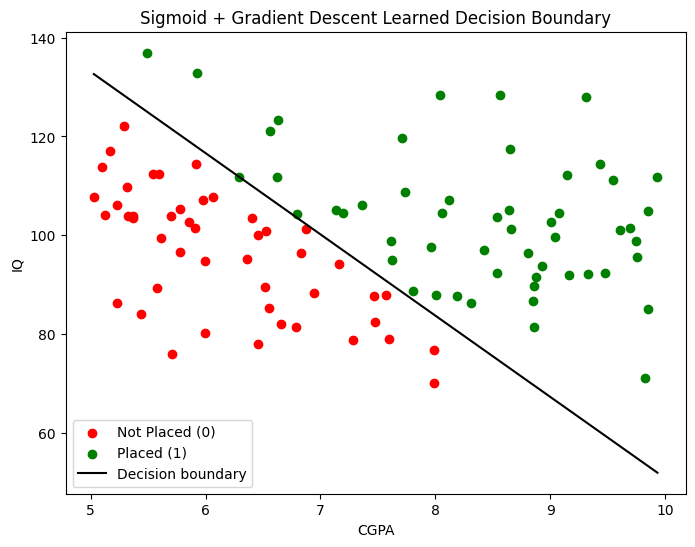

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# -----------------
# Generate data
# -----------------
num_samples = 100
cgpa = np.random.uniform(5.0, 10.0, num_samples)
iq = np.random.normal(100, 15, num_samples)
linear_score = 0.6 * (cgpa - 7) + 0.04 * (iq - 100)
placement = (linear_score > 0).astype(int)

df = pd.DataFrame({
    'cgpa': cgpa,
    'iq': iq,
    'placement': placement
})

# -----------------
# Standardize features
# -----------------
X = df[['cgpa', 'iq']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = np.where(df['placement']==0, 0, 1)

# -----------------
# Sigmoid function
# -----------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# -----------------
# Training: sigmoid + gradient descent
# -----------------
eta = 0.01
epochs = 10000
w = np.zeros(X_scaled.shape[1])
b = 0

for epoch in range(epochs):
    errors = 0
    for xi, target in zip(X_scaled, y):
        z = np.dot(w, xi) + b
        pred = sigmoid(z)
        w += eta * (target - pred) * xi
        b += eta * (target - pred)
        pred_label = int(pred >= 0.5)
        errors += int(pred_label != target)
    if errors == 0:
        print(f"Converged at epoch {epoch}")
        break

# Normalize weights for stable plotting
norm = np.linalg.norm(w)
if norm != 0:
    w /= norm
    b /= norm

print("Final weights:", w)
print("Final bias:", b)

# -----------------
# Plot decision boundary
# -----------------
plt.figure(figsize=(8,6))

# Inverse transform to original scale for plotting
X_orig = scaler.inverse_transform(X_scaled)
df['cgpa_scaled'] = X_orig[:,0]
df['iq_scaled'] = X_orig[:,1]

plt.scatter(df['cgpa_scaled'][df['placement']==0], df['iq_scaled'][df['placement']==0],
            color='red', label='Not Placed (0)')
plt.scatter(df['cgpa_scaled'][df['placement']==1], df['iq_scaled'][df['placement']==1],
            color='green', label='Placed (1)')

# Plot decision boundary
x_vals = np.linspace(df['cgpa_scaled'].min(), df['cgpa_scaled'].max(), 400)
x_scaled = (x_vals - scaler.mean_[0]) / scaler.scale_[0]
if w[1] != 0:
    y_scaled = (-w[0] * x_scaled - b) / w[1]
    y_vals = y_scaled * scaler.scale_[1] + scaler.mean_[1]
    plt.plot(x_vals, y_vals, 'k', label='Decision boundary')

plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.legend()
plt.title("Sigmoid + Gradient Descent Learned Decision Boundary")
plt.show()
